<a href="https://colab.research.google.com/github/chukhman/lncRNAclassifier/blob/main/Copyof_keras_binary_classifier_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
import numpy as np

In [5]:
seed = 7
# load dataset
dataset = np.loadtxt("./sample_data/NewGencode4DLTraining2.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:12]
Y = dataset[:,12]

In [6]:
(unique, counts) = np.unique(Y, return_counts=True)
print('Unique values of the target variable', unique)
print('Counts of the target variable :', counts)

Unique values of the target variable [0. 1.]
Counts of the target variable : [10010 17561]


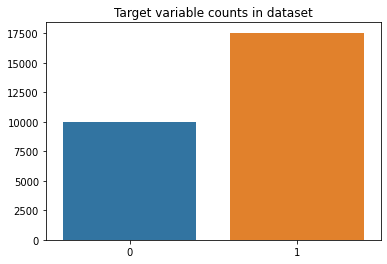

In [7]:
sns.barplot(x=[0,1],y=[10010, 17561])
plt.title('Target variable counts in dataset')
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.25, random_state=0)

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
predictions = model.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  4132
False Positive(FP) =  143
True Negative(TN)  =  2310
False Negative(FN) =  308
Accuracy of the binary classification = 0.935


In [13]:
models = {}

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
models['GradientBoosting'] = GradientBoostingClassifier()

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [14]:
# Neural Networks
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=12))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=80, batch_size=64)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 20)                2580      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 12)                252       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 4,509
Trainable params: 4,509
Non-trainabl

[]

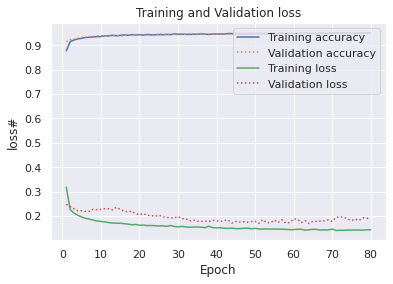

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

sns.set()
loss = hist.history['loss']
val = hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val, ':', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss#')
plt.legend(loc='upper right')
plt.plot()



In [16]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test) > 0.5
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy_keras =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy_keras))

216/216 [==============================] - 0s 1ms/step
True Positive(TP)  =  4204
False Positive(FP) =  125
True Negative(TN)  =  2328
False Negative(FN) =  236
Accuracy of the binary classification = 0.948


In [17]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(16, input_dim=12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=64)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                208       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 20)                340       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_6 (Dense)             (None, 15)                315       
                                                                 
 dense_7 (Dense)             (None, 1)                 16        
                                                                 
Total params: 879
Trainable params: 879
Non-trainable 

[]

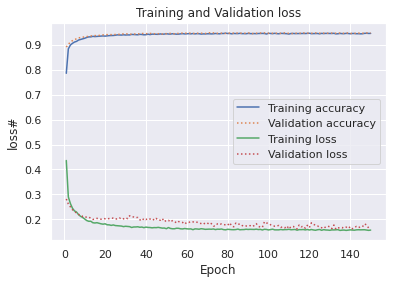

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

sns.set()
loss = hist.history['loss']
val = hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val, ':', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss#')
plt.legend(loc='center right')
plt.plot()


In [19]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test) > 0.5
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy_keras =  (TP+TN) /(TP+FP+TN+FN)
precision_keras =  (TP) /(TP+FP)
recall_keras =  (TP) /(TP+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy_keras))
print('Precision of the binary classification = {:0.3f}'.format(precision_keras))
print('Recall of the binary classification = {:0.3f}'.format(recall_keras))

216/216 [==============================] - 0s 1ms/step
True Positive(TP)  =  4224
False Positive(FP) =  144
True Negative(TN)  =  2309
False Negative(FN) =  216
Accuracy of the binary classification = 0.948
Precision of the binary classification = 0.967
Recall of the binary classification = 0.951


216/216 [==============================] - 0s 1ms/step


Text(89.18, 0.5, 'Actual label')

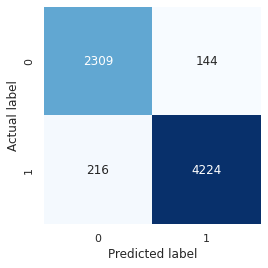

In [20]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['0', '1']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [21]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

DNN = {'Accuracy':accuracy_keras,'Precision':precision_keras,'Recall':recall_keras}
#append row to the dataframe
df_model = df_model.append(DNN, ignore_index=True)
df_model.index = ['GradientBoosting','Logistic Regression', 'Support Vector Machines', 'Decision Trees', 'Random Forest','Naive Bayes','K-Nearest Neighbor','DNN']
df_model



,Accuracy,Precision,Recall
GradientBoosting,0.947773,0.953604,0.964904
Logistic Regression,0.934571,0.930631,0.966550
Support Vector Machines,0.935297,0.926577,0.971658
Decision Trees,0.918613,0.938964,0.934963
Random Forest,0.947918,0.951802,0.966827
Naive Bayes,0.877992,0.820495,0.988066
K-Nearest Neighbor,0.888873,0.884234,0.939684
DNN,0.947773,0.967033,0.951351


# Results

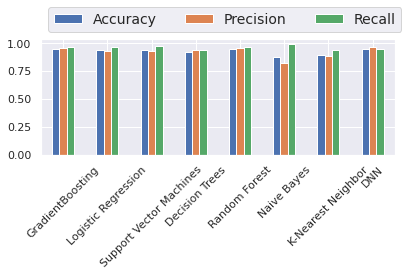

In [22]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

In [23]:
from sklearn.model_selection import StratifiedKFold

k = 5

accuracy, precision, recall = {}, {}, {}

# define k-fold cross validation test harness
kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)

models['DNN'] = model

zero_data = np.zeros(shape=(len(models.keys()),3))
df_cvmodel = pd.DataFrame(zero_data, index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])

    




In [24]:
#df_cvmodel=0
df_cvmodel['Accuracy']['DNN']

0.0

In [25]:
for train, test in kfold.split(X, Y):
  # print(X)  //print(Y)
  X_train = X[train]
  X_test = X[test]
  y_train = Y[train]
  y_test = Y[test]

  print(X_train.size,X_train.max())

  for key in models.keys():
    
    print(key)

    # Fit the classifier model
    if (key == 'DNN'):    
      hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=64)
    else:
      models[key].fit(X_train, y_train)
    
    print("Model " + key+ " Fitted")

    # Prediction 
    if (key == 'DNN'):
      predictions = models[key].predict(X_test) > 0.5
    else:
      predictions = models[key].predict(X_test)

    
    # Calculate Accuracy, Precision and Recall Metrics
    df_cvmodel['Accuracy'][key] += accuracy_score(predictions, y_test)/k
    df_cvmodel['Precision'][key] += precision_score(predictions, y_test)/k
    df_cvmodel['Recall'][key] += recall_score(predictions, y_test)/k

    # accuracy[key] precision[key]  recall[key]


264672 119.55879548091853
GradientBoosting
Model GradientBoosting Fitted
Logistic Regression
Model Logistic Regression Fitted
Support Vector Machines


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Support Vector Machines Fitted
Decision Trees
Model Decision Trees Fitted
Random Forest
Model Random Forest Fitted
Naive Bayes
Model Naive Bayes Fitted
K-Nearest Neighbor
Model K-Nearest Neighbor Fitted
DNN
690/690 [==============================] - 1s 2ms/step - loss: 0.1709 - accuracy: 0.9440
Model DNN Fitted
173/173 [==============================] - 0s 1ms/step
264684 119.55879548091853
GradientBoosting
Model GradientBoosting Fitted
Logistic Regression
Model Logistic Regression Fitted
Support Vector Machines


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Support Vector Machines Fitted
Decision Trees
Model Decision Trees Fitted
Random Forest
Model Random Forest Fitted
Naive Bayes
Model Naive Bayes Fitted
K-Nearest Neighbor
Model K-Nearest Neighbor Fitted
DNN
690/690 [==============================] - 3s 4ms/step - loss: 0.1652 - accuracy: 0.9452
Model DNN Fitted
173/173 [==============================] - 0s 2ms/step
264684 119.55879548091853
GradientBoosting
Model GradientBoosting Fitted
Logistic Regression
Model Logistic Regression Fitted
Support Vector Machines


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Support Vector Machines Fitted
Decision Trees
Model Decision Trees Fitted
Random Forest
Model Random Forest Fitted
Naive Bayes
Model Naive Bayes Fitted
K-Nearest Neighbor
Model K-Nearest Neighbor Fitted
DNN
690/690 [==============================] - 1s 2ms/step - loss: 0.1689 - accuracy: 0.9430
Model DNN Fitted
173/173 [==============================] - 0s 1ms/step
264684 119.55879548091853
GradientBoosting
Model GradientBoosting Fitted
Logistic Regression
Model Logistic Regression Fitted
Support Vector Machines


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Support Vector Machines Fitted
Decision Trees
Model Decision Trees Fitted
Random Forest
Model Random Forest Fitted
Naive Bayes
Model Naive Bayes Fitted
K-Nearest Neighbor
Model K-Nearest Neighbor Fitted
DNN
690/690 [==============================] - 1s 2ms/step - loss: 0.1716 - accuracy: 0.9431
Model DNN Fitted
173/173 [==============================] - 0s 1ms/step
264684 80.49454858502118
GradientBoosting
Model GradientBoosting Fitted
Logistic Regression
Model Logistic Regression Fitted
Support Vector Machines


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Support Vector Machines Fitted
Decision Trees
Model Decision Trees Fitted
Random Forest
Model Random Forest Fitted
Naive Bayes
Model Naive Bayes Fitted
K-Nearest Neighbor
Model K-Nearest Neighbor Fitted
DNN
690/690 [==============================] - 1s 2ms/step - loss: 0.1549 - accuracy: 0.9466
Model DNN Fitted
173/173 [==============================] - 0s 1ms/step


In [26]:
df_cvmodel


,Accuracy,Precision,Recall
GradientBoosting,0.946103,0.949832,0.965018
Logistic Regression,0.927895,0.921473,0.963741
Support Vector Machines,0.915346,0.902739,0.962007
Decision Trees,0.913968,0.933888,0.931264
Random Forest,0.947155,0.949262,0.967183
Naive Bayes,0.869791,0.810432,0.981984
K-Nearest Neighbor,0.891807,0.887876,0.938965
DNN,0.947699,0.947269,0.969938


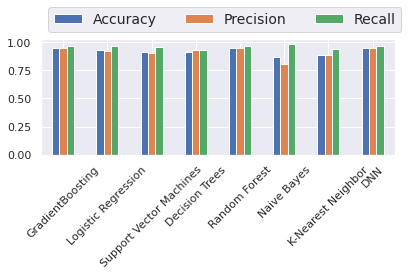

In [27]:
axcv  = df_cvmodel.plot.bar(rot=45)
axcv.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

In [ ]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

# Run classifier with cross-validation and plot ROC curves
# cv = StratifiedKFold(n_splits=6)
classifier = models['GradientBoosting']  # svm.SVC(kernel="linear", probability=True, random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
y = Y

fig, ax = plt.subplots()
for i, (train, test) in enumerate(kfold.split(X, y)):
    classifier.fit(X[train], y[train])
    if ( False ):
      viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
      )
    else:  
      hist = model.fit(X[train], y[train], validation_data=(X[test], y[test]), epochs=150, batch_size=64)
      predictions = models[key].predict(X[test]) > 0.5
      viz = RocCurveDisplay.from_predictions(
          y[test],
          predictions,
          name="ROC fold {}".format(i),
          alpha=0.3,
          lw=1,
          ax=ax,
        )


    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()




Epoch 1/150
345/345 [==============================] - 1s 2ms/step - loss: 0.1656 - accuracy: 0.9450 - val_loss: 0.1443 - val_accuracy: 0.9503
Epoch 2/150
345/345 [==============================] - 1s 2ms/step - loss: 0.1677 - accuracy: 0.9446 - val_loss: 0.1460 - val_accuracy: 0.9521
Epoch 3/150
345/345 [==============================] - 1s 2ms/step - loss: 0.1628 - accuracy: 0.9458 - val_loss: 0.1489 - val_accuracy: 0.9500
Epoch 4/150
345/345 [==============================] - 1s 2ms/step - loss: 0.1647 - accuracy: 0.9460 - val_loss: 0.1475 - val_accuracy: 0.9487
Epoch 5/150
345/345 [==============================] - 1s 2ms/step - loss: 0.1641 - accuracy: 0.9441 - val_loss: 0.1515 - val_accuracy: 0.9485
Epoch 6/150
345/345 [==============================] - 1s 2ms/step - loss: 0.1601 - accuracy: 0.9449 - val_loss: 0.1499 - val_accuracy: 0.9487
Epoch 7/150
345/345 [==============================] - 1s 2ms/step - loss: 0.1704 - accuracy: 0.9462 - val_loss: 0.1450 - val_accuracy: 0.9503